<a href="https://colab.research.google.com/github/PSourabh97/Book-Recommendation-System/blob/main/Book_Recommendation_System_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/06/build-book-recommendation-system-unsupervised-learning-project/

# **Let's start the project-**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns=999

In [ ]:
books = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System- SOURABH PRAMANIK/Books.csv', encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System- SOURABH PRAMANIK/Users.csv',encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System- SOURABH PRAMANIK/Ratings.csv',encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Let's print the shapes of all the Datasets-

print(books.shape)

print(users.shape)

print(ratings.shape)

(271360, 8)
(278858, 3)
(527556, 3)


## **Visualization-**

**Visualizing the total counts of all type of Ratings-**

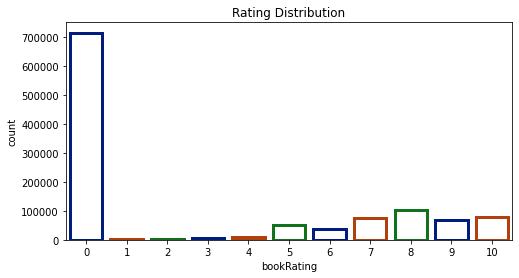

In [ ]:
plt.figure(figsize=(8,4))
ax = sns.countplot(x="bookRating", data=ratings,
                   facecolor=(0, 0, 0, 0),
                   linewidth=3,
                   edgecolor=sns.color_palette("dark", 3))
plt.title('Rating Distribution')
plt.show()

**Visualizing the total counts of all Age groups-**

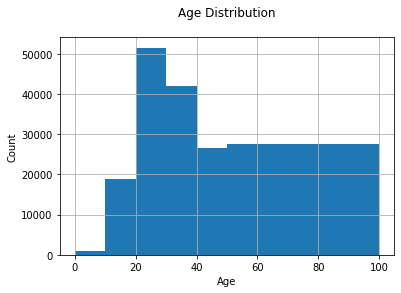

In [ ]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## Checking the Null values present in Datasets-

In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   userID      1149780 non-null  int64 
 1   ISBN        1149780 non-null  object
 2   bookRating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   userID    278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


**Users Dataset has null values present in age column.**

In [ ]:
# Mean value of the age column-

mean = round(users['Age'].mean())   
mean

35

In [ ]:
users['Age'] = users['Age'].fillna(mean)      # filling null values with mean
users['Age'] = users['Age'].astype(int)       # changing Datatype to int

In [ ]:
print(users.isna().sum())                     # Now checking the Null values

userID      0
Location    0
Age         0
dtype: int64


In [ ]:
ratings['userID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: userID, Length: 105283, dtype: int64

## **Now we will exclude some records for better Recommendation**-

1. **Users with less than 200 Ratings given.**
2. **Books with less than 100 Ratings.**

In [ ]:
counts1 = ratings['userID'].value_counts()

ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 200].index)]  #Taking only those index whose user rating count is grater than 200

counts = ratings['bookRating'].value_counts()

ratings = ratings[ratings['bookRating'].isin(counts[counts >= 100].index)] # Taking only those index whose Book rating count is grater than 100

# **We will do Collaborative Filtering here-**

**Now we will merge 'Book' and 'Ratings' w.r.t the unique id column 'ISBN' and will drop some unnecessary columns.**

In [ ]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')                                          # Merging datasets
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']  # Columns need to drop
combine_book_rating = combine_book_rating.drop(columns, axis=1)

combine_book_rating.head()

,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


**Now we will group by book titles and create a new column for total rating count.**

In [ ]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
                    groupby(by = ['bookTitle'])['bookRating'].
                    count().
                    reset_index().
                    rename(columns = {'bookRating': 'totalRatingCount'})
                    [['bookTitle', 'totalRatingCount']]
                   )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


**Now we will combine Rating data with the Total rating count data.**

In [ ]:
# We are combining here w.r.t the 'Book Title'-

rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')

rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


**We will set a threshold value = 50 and extract books that have received more than 50 ratings-**

**By setting threshold value we will extract the Popular books.**

In [ ]:
popularity_threshold = 50                                                                             #Threshold value 
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')

rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


**Let's check the shape-**

In [ ]:
rating_popular_book.shape


(62149, 5)

### **As our dataset contains the book ratings of users of different different regions. So let's filter some specific region's like US and Canada.**

In [ ]:
combined = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left') #Merging Users dataset because Users dataset has Location column.

us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating=us_canada_user_rating.drop('Age', axis=1)                        # We will drop this Age column because we are not recommending w.r.t age.
us_canada_user_rating.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


# **Modeling-**

**We have prepared our dataset for modeling. we will use the Nearest Neighbors algorithm which is the similar as K nearest which is used for clustering based on euclidian distance.**

**We will convert our table to a 2D matrix, and will fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.**

In [ ]:
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID', 'bookTitle'])  # Dropping the duplicate values of these columns

us_canada_user_rating_pivot = us_canada_user_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)  #Creating the pivot table
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [ ]:
# We can see here in this pivot table index is Book title , column is user id's and value is Ratings.

us_canada_user_rating_pivot.head()

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,9856,10447,10819,11601,11993,12538,12824,13082,13273,13552,13850,14422,14521,15408,16106,16634,16795,16916,16966,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,28634,29259,29855,30276,30487,30533,30735,30972,31315,31391,31556,31826,31846,32195,32773,33974,35050,35836,35857,35859,36554,36606,36609,36836,36907,37712,37950,38023,38273,38556,38781,39281,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,44595,44728,46398,47316,48494,49109,49460,49889,50225,50547,50730,51094,51386,51450,51883,52199,52584,52614,52853,52917,53174,55187,55490,55492,55548,55734,55892,56447,56856,56959,59172,59727,59971,60244,60277,60337,60707,61619,62272,62891,63394,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69697,69971,70052,70415,70594,71712,73394,73651,75591,75860,76151,76352,76499,76818,76942,77809,78553,78783,78834,79186,79441,80683,81045,81492,81977,82407,82831,82893,82926,83287,83637,84024,85426,85526,85656,85701,85757,85993,86641,87141,87143,87555,87746,87974,88677,88733,88793,88937,89602,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94347,94923,95010,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,99955,100459,100846,100906,101209,101305,101851,101876,102275,102359,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107453,107784,108005,108285,108352,109461,109574,110214,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113904,113983,114368,114414,114444,114868,114988,115003,115120,115490,116122,117251,117539,119575,120093,122429,122793,123790,123883,123981,124078,124079,124363,124487,124942,125039,125203,125519,125692,126492,126604,126736,127200,127233,127359,127429,127914,128208,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131837,132083,133571,133689,133747,133868,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140036,140358,141493,141710,141902,142093,142524,143175,143253,143415,144531,144555,145449,145451,145619,145641,146113,146348,147141,147847,147965,148199,148258,148744,149069,149907,149934,150124,150498,150968,150979,151589,151790,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159858,160819,161752,162052,162639,162738,163804,164027,164323,164465,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,168464,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173684,173835,174216,174304,174791,175003,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180917,181176,181687,182993,183196,183995,184299,185233,185384,186570,187145,187170,187256,187517,188010,188951,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,198621,198699,198711,199772,200226,200674,201017,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,207246,207349,207499,207782,208141,208147,208406,208568,208671,208829,209373,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,216012,216466,216683,217106,217375,218552,218608,219546,220278,221445,222050,222204,222296,222941,223087,223154,224138,224349,224430,224435,224764,225087,225199,225595,225763,225810,225989,226545,226879,226965,227447,227520,227705,228681,228764,228998,229011,229313,229551,229741,230249,230496,230522,230708,231210,231827,232131,232945,233911,233917,234359,234623,234721,23

**To find the Nearest Neighbors We will use unsupervised algorithms with sklearn.neighbors.Now we will train the nearest neighbors algorithm. here we need to specify an algorithm which is brute means find the distance of every point to every other point.And we will specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we will fit the model.**

In [ ]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric ='cosine', algorithm ='brute')

model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

**Let's select one random Book name index-**

In [ ]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

64


**Book Name-**

In [ ]:
us_canada_user_rating_pivot.index[query_index]

'Back Roads'

**Now we will get the similar Book name recommendations as well as the percentage of similarity-**

In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Back Roads:

1: Midwives: A Novel, with distance of 0.7240557589447825:
2: A Lesson Before Dying (Vintage Contemporaries (Paperback)), with distance of 0.7321897474541036:
3: River, Cross My Heart, with distance of 0.7569051498148944:
4: Songs in Ordinary Time (Oprah's Book Club (Paperback)), with distance of 0.7903251632155364:
5: What Looks Like Crazy On An Ordinary Day, with distance of 0.7906623776897458:
